<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [73]:
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd
import random
import math

In [176]:
SIZE = 100        #基本尺寸
#斜坡属性
WIDTH = 50        #斜坡宽度
HEIGHT = 50      #斜坡高度
K = WIDTH/HEIGHT  #斜坡斜率

WIDE_HEIGHT = 20   #海浪高度
WIDE_STRENGTH = 2  #海浪强度

In [189]:
#设置初始位置
def initial():  
    pos=[]
    for i in range(SIZE):
        array=[]
        if i < HEIGHT:
            for j in range(SIZE):
                if j < i*K :
                    array.append(0)
                else:
                    array.append(1)
            pos.append(array)
        else:
            for j in range(SIZE):
                array.append(0)
            pos.append(array) 
    return pos

#绘制当前沙堆形状
def draw(pos):
    x=[]
    y=[]
    for i in range(SIZE):
        for j in range(SIZE):
            if pos[i][j] == 1 :
                x.append(j)
                y.append(i)
    fig, axScatter = plt.subplots(figsize=(6,6))
    # the scatter plot:
    axScatter.scatter(x, y)
    axScatter.set_aspect(1.)
    plt.axis([0,100,0,100])
    plt.show()
    return x,y

In [218]:
#海浪冲击函数
def wave_function(pos):
#假设对于每一层沙子是同时作用的，即，同时抽空
    for i in range(SIZE):
        if i < WIDE_HEIGHT :
            term = 0
            for j in range(SIZE):
                if pos[i][j] == 1 :
                    term = j
                    break
            for k in range(WIDE_STRENGTH):
                if term + k < SIZE - 1 :
                    pos[i][term+k] = 0
    return pos

 #计算高度函数
def len_cal(pos):
    cliff_len=[]
    for i in range(SIZE): #这里的i对应横坐标
        term = 0 
        for j in range(SIZE): #这里的j对应纵坐标
            if pos[j][i]  == 1 :
                term = j+1
        cliff_len.append(term)
    return cliff_len

#计算差值函数
def cliff_difference(cliff_len):
    #计算差值
    cliff_dif=[]
    for i in range(SIZE): #这里的i对应横坐标
        if i == 0:
            cliff_dif.append(cliff_len[i])
        else:
            cliff_dif.append(cliff_len[i] - cliff_len[i-1])
    return cliff_dif

#通过差值还原pos函数
def len2pos(cliff_len):
    pos=[]
    for i in range(SIZE):
        array=[]
        for j in range(SIZE):
            if cliff_len[j] > i:
                array.append(1)
            else:
                array.append(0)
        pos.append(array)
    return pos
            
#定义沙堆下坠规则
#如果 S(x)-S(x-1) = 2 ,有 50%的几率下坠
#如果 S(x)-S(x-1) = i ,i>2 下坠概率 p = 50% + (i-2)*25%

#下坠函数
def fall_function(cliff_len):
    for times in range(10): #计算10次
        cliff_dif = cliff_difference(cliff_len)
        for i in range(SIZE): #这里的i对应横坐标
            p=0
            if(cliff_dif[i] >= 2):
                p=0.5+(cliff_dif[i]-2)*0.25
                if p >= random.randint(0,100)/100:
                    cliff_len[i] = cliff_len[i] -  math.ceil(cliff_dif[i]/2)#该位置减小差值的一半并向上取整
                    cliff_len[i-1] = cliff_len[i-1] + (cliff_dif[i]-math.ceil(cliff_dif[i]/2))
    return cliff_len

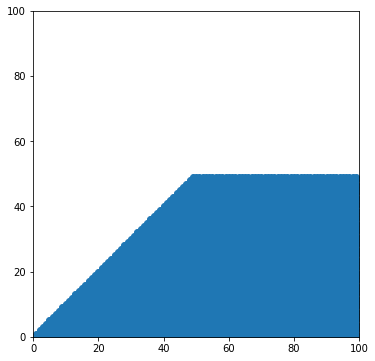

In [190]:
pos=initial()
x,y=draw(pos)

In [180]:
pos=initial()
cliff_len=len_cal(pos)
print(cliff_len)
cliff_dif = cliff_difference(cliff_len)
print(cliff_dif)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


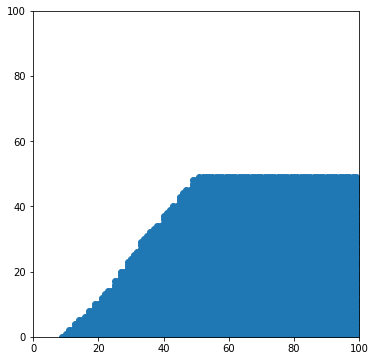

In [219]:
pos=initial()
WAVE_TIMES = 5
for i in range(WAVE_TIMES):
    pos=wave_function(pos)
    cliff_len=len_cal(pos)
    cliff_len=fall_function(cliff_len)
    pos=len2pos(cliff_len)
x,y=draw(pos)